Generaremos un conjunto de datos aleatorio con dos features y cuatro centros (número de etiquetas de clase o grupos) utilizando la función make_blobs disponible en el paquete sklearn.

**n_samples**: número de muestras u observaciones (filas)

**n_features**: número de características o variables

**centres**: número de clusters a crear

**cluster_std**: la desviación estándar de los clusters. Cuanto menor sea la desviación estándar, más cerca estarán los puntos de datos en un grupo determinado

**random_state**: Establecer en cualquier int (generalmente 0 o 42) para obtener el mismo resultado cuando lo ejecute varias veces. Cuando hay un proceso de aleatorización involucrado, debe usar random_state para crear una salida reproducible. 

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd

dataset, classes = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=0)

df = pd.DataFrame(dataset, columns=['var1', 'var2'])
df.head()


,var1,var2
0,2.204387,1.560857
1,-1.133740,2.684673
2,1.064983,4.102897
3,-2.376038,7.324207
4,1.682890,0.484444


En k-means, es esencial proporcionar los números del grupo que se formarán a partir de los datos. En el conjunto de datos, sabíamos que hay cuatro grupos. Pero, cuando no conocemos la cantidad de números del grupo, tenemos que usar métodos como los métodos **Elbow** o **Silhouette** para encontrar la cantidad óptima de grupos en el conjunto de datos. Aquí, se usara el método Elbow para encontrar la cantidad óptima de clústeres.

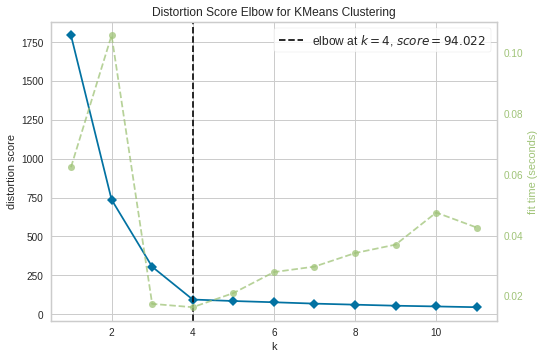

In [5]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

En el grafico anterior, el número óptimo de clusters (k) se representa frente a la distorsión (total de la suma de cuadrados dentro del cluster para un número dado de k). El número óptimo de k es un punto donde hay una curva en la curva (elbow o knee). Según el método elbow, el número óptimo de grupos (k) es 4.
Si los datos no están bien agrupados, es posible que el método del codo no funcione.

Otro parámetro importante es init, que define la inicialización del método a usar (default=’k-means++’). El algoritmo k-means++ utiliza la técnica de seeding para la inicialización del centroide, que es mejor que el método de inicialización aleatoria.

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)

Una vez que el cluster k-means se completa con éxito, la clase KMeans tendrá los siguientes atributos importantes para obtener los valores de retorno:

**etiquetas_ :** proporciona etiquetas de clase predichas (cluster) para cada punto de datos

**cluster_centers_ :** Ubicación de los centroides en cada clúster. El punto de datos en un cluster estará cerca del centroide de ese grupo. Como tenemos dos funciones y cuatro clusters, deberíamos obtener cuatro ubicaciones.

**inertia_ :** da la suma de cuadrados dentro del cluster. Este es un total de la suma de cuadrados dentro del cluster para todos los grupos.

**n_iter_ :** número de iteraciones que ejecuta el algoritmo k-means para obtener una suma mínima de cuadrados dentro del cluster


In [7]:
kmeans.labels_  # es lo mismo que kmeans.predict(df)

array([1, 0, 3, 2, 1, 3, 0, 3, 3, 3, 3, 1, 0, 0, 1, 3, 2, 2, 2, 1, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 3, 2, 3, 0, 1, 0, 3, 0, 3, 3, 2, 2, 2, 2, 3,
       1, 0, 3, 2, 2, 3, 2, 0, 0, 2, 3, 2, 0, 1, 3, 1, 2, 3, 1, 3, 2, 3,
       1, 2, 0, 0, 1, 1, 3, 3, 0, 2, 0, 0, 1, 1, 2, 3, 1, 0, 0, 3, 3, 1,
       0, 0, 2, 2, 2, 3, 3, 1, 0, 2, 3, 3, 2, 1, 1, 2, 2, 0, 3, 1, 1, 3,
       2, 0, 0, 1, 1, 3, 0, 0, 2, 3, 2, 0, 3, 1, 3, 0, 3, 0, 1, 3, 0, 1,
       0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 3, 1, 0, 2, 2, 2, 3, 0,
       1, 3, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 3, 1, 1, 0, 1, 3, 0, 2, 2, 2,
       3, 3, 0, 3, 0, 1, 3, 1, 3, 0, 0, 2, 3, 2, 1, 1, 3, 2, 0, 0, 0, 3,
       2, 1], dtype=int32)

In [8]:
kmeans.inertia_

94.02242630751758

In [9]:
kmeans.n_iter_

2

In [10]:
kmeans.cluster_centers_

array([[-1.60782913,  2.9162828 ],
       [ 2.06911036,  0.96146833],
       [-1.33173192,  7.7400479 ],
       [ 0.91932803,  4.34824615]])

In [11]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 50, 1: 50, 2: 50, 3: 50})

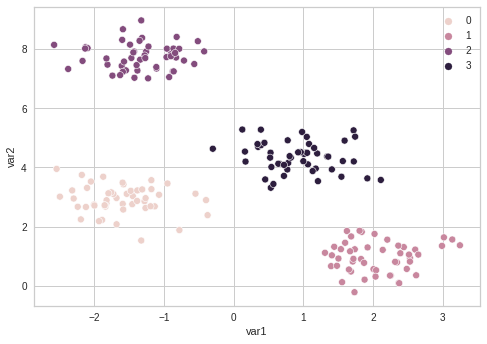

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)
plt.show()

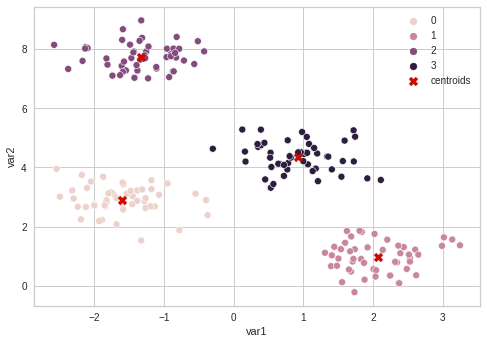

In [13]:
sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()